In [29]:
#imports
import struct
import json
import numpy as np
import matplotlib.pyplot as plt
import math

#load json data to np array
f = open('result.json')
data = json.load(f)
arr = np.array(data["2023-10-21-18:21:38:108"]["point_cloud"])
arr

array([[ 43.20603184, -22.24181105,  -1.7647118 ],
       [ 43.20611032, -21.7989843 ,  -1.76471171],
       [ 43.20618506, -21.35922704,  -1.76471168],
       ...,
       [ 11.53613223,  -5.93052406,  -5.22241355],
       [ 11.51417237,  -5.86102814,  -5.22284962],
       [ 11.49154967,  -5.79174319,  -5.22329981]])

In [30]:
#specify z range and get xy array
z_min = -2.0
z_max = -1.0

mask = (arr[:, 2] >= z_min) & (arr[:, 2] <= z_max)
z_arr = arr[mask, :2]

print(z_arr)

[[ 43.20603184 -22.24181105]
 [ 43.20611032 -21.7989843 ]
 [ 43.20618506 -21.35922704]
 [ 43.45644265 -21.00515578]
 [ 20.32833412  -4.00329139]
 [ 19.72122179  -4.00318412]
 [ 19.15671842  -4.00308447]
 [ 18.63039384  -4.00299198]
 [ 18.13842885  -4.0029052 ]
 [ 17.67743028  -4.00282415]
 [ 17.24449638  -4.00274739]
 [ 16.83706359  -4.0026754 ]
 [ 16.45286915  -4.00260817]]


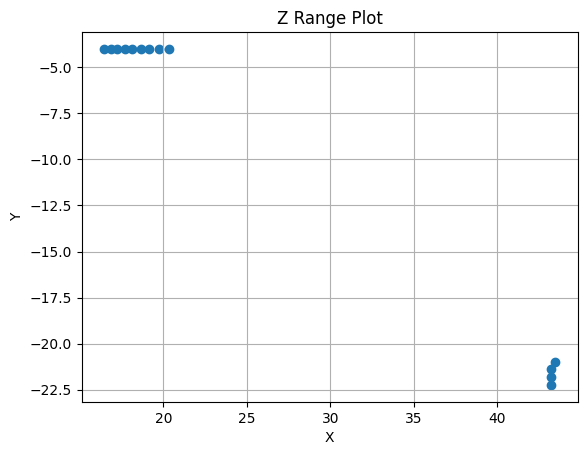

In [31]:
#filtered
plt.scatter(z_arr[:, 0], z_arr[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Z Range Plot')
plt.grid(True)
plt.show()

In [32]:
#get max x and y vals
#max x val
x_coords = z_arr[:, 0]
max_x = np.max(x_coords)
max_x_int = math.ceil(max_x)
print("max x: ",max_x)
print("max x int: ",max_x_int)

#max y val
y_coords = z_arr[:, 1]
max_y = np.max(y_coords)
max_y_int = math.ceil(max_y)
print("max y: ",max_y)
print("max y int: ",max_y_int)

max x:  43.45644264879946
max x int:  44
max y:  -4.002608171966513
max y int:  -4


In [33]:
#bin grid plt
point_cloud = z_arr
"""
#def size and res
grid_size = (max_x_int + 5, max_y_int + 5)
resolution = .5

#get grid size to convert
x_coords = z_arr[:, 0]
y_coords = z_arr[:, 1]
min_x = np.min(x_coords)
min_y = np.min(y_coords)
range_x = max_x - min_x
range_y = max_y - min_y
grid_size = (math.ceil(range_x / resolution) + 1, math.ceil(range_y / resolution) + 1)

#pc to bin arr
binary_grid = np.zeros(grid_size, dtype=int)
for point in point_cloud:
    x, y = point
    grid_x = int((x - min_x) / resolution)
    grid_y = int((y - min_y) / resolution)
    if 0 <= grid_x < grid_size[0] and 0 <= grid_y < grid_size[1]:
        binary_grid[grid_x, grid_y] = 1

#disp bin arr
plt.imshow(binary_grid.T, cmap='binary', origin='lower', extent=[0, range_x, 0, range_y])
plt.title('Binary Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
"""

"\n#def size and res\ngrid_size = (max_x_int + 5, max_y_int + 5)\nresolution = .5\n\n#get grid size to convert\nx_coords = z_arr[:, 0]\ny_coords = z_arr[:, 1]\nmin_x = np.min(x_coords)\nmin_y = np.min(y_coords)\nrange_x = max_x - min_x\nrange_y = max_y - min_y\ngrid_size = (math.ceil(range_x / resolution) + 1, math.ceil(range_y / resolution) + 1)\n\n#pc to bin arr\nbinary_grid = np.zeros(grid_size, dtype=int)\nfor point in point_cloud:\n    x, y = point\n    grid_x = int((x - min_x) / resolution)\n    grid_y = int((y - min_y) / resolution)\n    if 0 <= grid_x < grid_size[0] and 0 <= grid_y < grid_size[1]:\n        binary_grid[grid_x, grid_y] = 1\n\n#disp bin arr\nplt.imshow(binary_grid.T, cmap='binary', origin='lower', extent=[0, range_x, 0, range_y])\nplt.title('Binary Grid')\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.show()\n"

In [34]:
#bin grid plt function
point_cloud = z_arr #xy coord array at specified z range

#funct
def to_bin(point_cloud, resolution=0.5):

  #get grid size to convert
  x_coords = z_arr[:, 0]
  y_coords = z_arr[:, 1]
  min_x = np.min(x_coords)
  min_y = np.min(y_coords)
  range_x = max_x - min_x
  range_y = max_y - min_y
  grid_size = (math.ceil(range_x / resolution) + 1, math.ceil(range_y / resolution) + 1)

  #pc to bin arr
  binary_grid = np.zeros(grid_size, dtype=int)
  for point in point_cloud:
    x, y = point
    grid_x = int((x - min_x) / resolution)
    grid_y = int((y - min_y) / resolution)
    if 0 <= grid_x < grid_size[0] and 0 <= grid_y < grid_size[1]:
        binary_grid[grid_x, grid_y] = 1

  #check bin grid
  print(binary_grid)

#call
to_bin(z_arr)


[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
